# IMDB Example

This example is based on an example from François Chollet's Deep Learning
with Python that was also made available in the
`3.5-classifying-movie-reviews.ipynb` notebook at

    https://github.com/fchollet/deep-learning-with-python-notebooks

In [ ]:
!cd .. && pip install -e .

In [1]:
from keras import layers, models
from keras.datasets import imdb
from keras.layers import Dense
from keras.losses import binary_crossentropy
from keras.optimizers import RMSprop
from keras.utils import to_categorical

import numpy as np

from pybt import Trainer
from pybt.model import KerasModelWrapper
from pybt.policy.ready import ReadyAfter
from pybt.policy.done import StopAfter

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.

    return results

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model = models.Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=RMSprop(lr=0.001),
              loss=binary_crossentropy,
              metrics=['accuracy'])

In [3]:
# Create a population with this model and train for 10 steps
m = KerasModelWrapper(model, optimizer=RMSprop(lr=0.001),
                      loss=binary_crossentropy,
                      metrics=['accuracy'])
t = Trainer(model=m,
    stopping_criteria=StopAfter(epochs=20),
    ready_strategy=ReadyAfter(4),
    step_args={'epochs_per_step': 2,
               'fit_args': {
                   'x': partial_x_train, 'y': partial_y_train,
                   'validation_data': (x_val, y_val),
                   'batch_size': 512}},
    eval_args={'x': x_val, 'y': y_val})
model, score = t.train()

10000/10000 [==============================] - 1s 100us/step
Train on 15000 samples, validate on 10000 samples
Epoch 1/2
15000/15000 [==============================] - 2s 108us/step - loss: 0.5093 - acc: 0.7849 - val_loss: 0.3894 - val_acc: 0.8571
Epoch 2/2
10000/10000 [==============================] - 1s 129us/step
Train on 15000 samples, validate on 10000 samples
Epoch 3/4
15000/15000 [==============================] - 1s 99us/step - loss: 0.2250 - acc: 0.9217 - val_loss: 0.2853 - val_acc: 0.8862
Epoch 4/4
10000/10000 [==============================] - 1s 121us/step
Train on 15000 samples, validate on 10000 samples
Epoch 3/4
15000/15000 [==============================] - 2s 107us/step - loss: 0.5128 - acc: 0.7809 - val_loss: 0.3890 - val_acc: 0.8657
Epoch 4/4
10000/10000 [==============================] - 1s 105us/step
Train on 15000 samples, validate on 10000 samples
Epoch 5/6
15000/15000 [==============================] - 2s 108us/step - loss: 0.2301 - acc: 0.9238 - val_loss: 0.28

10000/10000 [==============================] - 1s 146us/step
Train on 15000 samples, validate on 10000 samples
Epoch 17/18
15000/15000 [==============================] - 2s 140us/step - loss: 0.0494 - acc: 0.9854 - val_loss: 0.4324 - val_acc: 0.8707
Epoch 18/18
10000/10000 [==============================] - 2s 151us/step
Train on 15000 samples, validate on 10000 samples
Epoch 19/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.0334 - acc: 0.9923 - val_loss: 0.4709 - val_acc: 0.8729
Epoch 20/20
10000/10000 [==============================] - 1s 142us/step


## Plotting population results

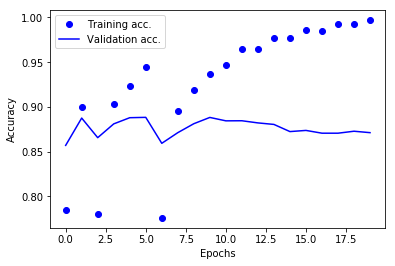

In [9]:
import matplotlib.pyplot as plt

last_member = t.observations()[-1]
obs = last_member['observations'][-1]

epochs, acc, loss, val_acc, val_loss = ([], [], [], [], [])
for x in last_member['observations']:
    epochs.extend(x['epochs'])
    acc.extend(x['acc'])
    loss.extend(x['loss'])
    val_acc.extend(x['val_acc'])
    val_loss.extend(x['val_loss'])

plt.plot(epochs, acc, 'bo', label='Training acc.')
plt.plot(epochs, val_acc, 'b', label='Validation acc.')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

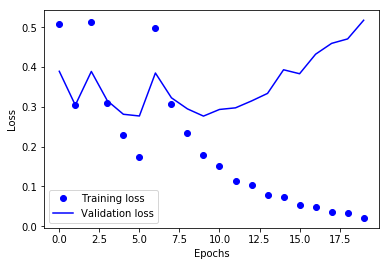

In [10]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()